# Galaxies Morphology Classification Using Convolutional Neural Networks

## Model v2

Import required libraries.

In [0]:
import os, random, shutil
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
print(tf.__version__)  # check tensorflow version

2.2.0


The data set used is built using the the notebook available in the GitHub repository: https://github.com/nunorc/galaxy-convnet

Set the train and validation directory with the images.

In [0]:
train_dir = 'data/train'
validation_dir = 'data/validation'

Get the total images in the training and validation dataset, this should be around 8044 images for training, and 3450 for validation.

In [5]:
total_train = 0
for c in ['elliptical', 'lenticular', 'spiral']:
  total_train += len(os.listdir(os.path.join(train_dir, c)))
print('Total train:', total_train)

total_validation = 0
for c in ['elliptical', 'lenticular', 'spiral']:
  total_validation += len(os.listdir(os.path.join(validation_dir, c)))
print('Total validation:', total_validation)

Total train: 8044
Total validation: 3450


Set the batch size.

In [0]:
BS = 32

Create the data generator for both sets, but now with image augmentation, where random operations are made on images like random shifts or rotations on each batch, stil do the rescale and set the target size.

In [7]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
                    rescale=1.0/255,
                    rotation_range=25,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.2)
validation_datagen  = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1.0/255.)
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150,150),
                                                    batch_size=BS,
                                                    shuffle=True,
                                                    class_mode='categorical')
validation_generator = train_datagen.flow_from_directory(validation_dir,
                                                         target_size=(150,150),
                                                         batch_size=BS,
                                                         shuffle=False,
                                                         class_mode='categorical')

Found 8044 images belonging to 3 classes.
Found 3450 images belonging to 3 classes.


Create the model, using a sequence of convolution and pooling layers, followed by a dropout layer, a fully connected layer, and the last softmax layer.

In [0]:
model = tf.keras.models.Sequential([
    # first convolution layer, input is an 150x150 image x3 colors
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # second convolution layer
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # third convolution layer
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # fourth convolution layer
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # flatten the image pixels
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron fully connected hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [9]:
model.summary()  # inspect model 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

Compile the model to use a categorical cross entropy loss function, and a adam optmizier.

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Train the model for 100 epochs.

In [0]:
EPOCHS = 100

In [12]:
history = model.fit(train_generator,
                    epochs=EPOCHS,
                    validation_data=validation_generator,
                    verbose=1)

Epoch 1/100
252/252 [==============================] - 100s 398ms/step - loss: 0.7863 - accuracy: 0.5687 - val_loss: 0.6088 - val_accuracy: 0.6594
Epoch 2/100
252/252 [==============================] - 100s 396ms/step - loss: 0.5932 - accuracy: 0.6796 - val_loss: 0.5360 - val_accuracy: 0.6899
Epoch 3/100
252/252 [==============================] - 99s 393ms/step - loss: 0.5665 - accuracy: 0.7041 - val_loss: 0.4790 - val_accuracy: 0.7594
Epoch 4/100
252/252 [==============================] - 99s 392ms/step - loss: 0.5282 - accuracy: 0.7241 - val_loss: 0.5183 - val_accuracy: 0.7348
Epoch 5/100
252/252 [==============================] - 98s 390ms/step - loss: 0.5098 - accuracy: 0.7445 - val_loss: 0.4745 - val_accuracy: 0.7551
Epoch 6/100
252/252 [==============================] - 99s 393ms/step - loss: 0.5010 - accuracy: 0.7545 - val_loss: 0.4237 - val_accuracy: 0.8093
Epoch 7/100
252/252 [==============================] - 98s 391ms/step - loss: 0.4878 - accuracy: 0.7622 - val_loss: 0.4146

Build plots for the training and validation accuracy and

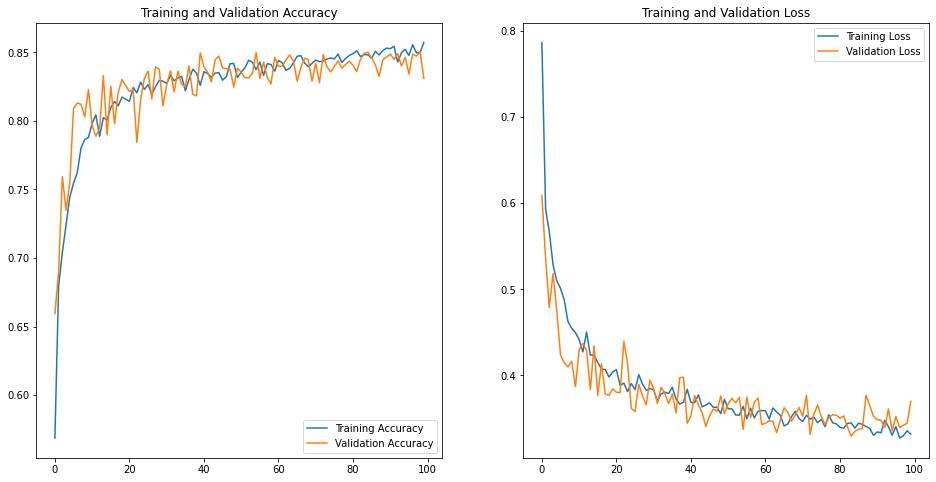

In [13]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))  # range for the number of epochs

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('./plots-v2.png')
plt.show()

Finally save the model.

In [0]:
model.save('galaxy-convnet-v2.h5')